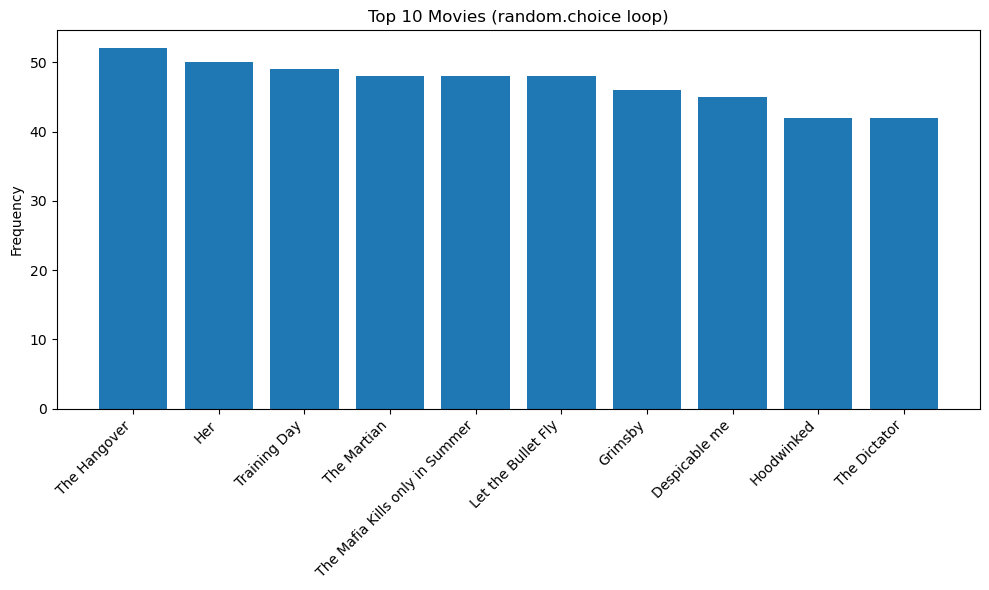

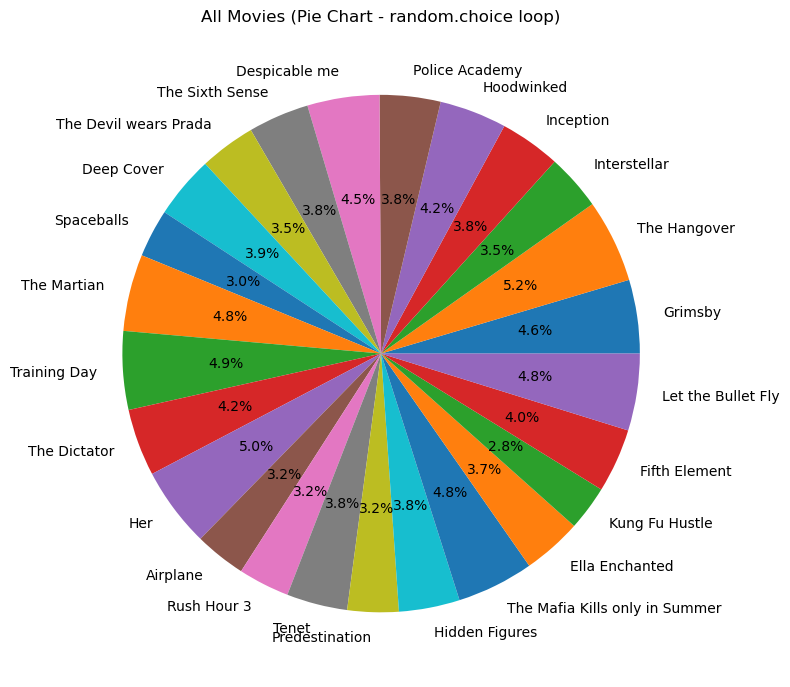

Selected movie: The Hangover
Frequency: 52


In [2]:
import random
from collections import Counter
import matplotlib.pyplot as plt

file_path = r"C:\Users\samta\Desktop\List.txt"

# Read movie list
with open(file_path, "r", encoding="utf-8") as f:
    movies = [line.strip() for line in f if line.strip()]

# Random sampling with replacement using random.choice in a loop
selections = [random.choice(movies) for _ in range(1000)]

# Count frequencies
counts = Counter(selections)

# ---------- Histogram for top 10 ----------
top10 = counts.most_common(10)
labels_top10, values_top10 = zip(*top10)

plt.figure(figsize=(10, 6))
plt.bar(labels_top10, values_top10)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title("Top 10 Movies (random.choice loop)")
plt.tight_layout()
plt.show()

# ---------- Pie chart for ALL movies ----------
labels_all = list(counts.keys())
values_all = list(counts.values())

plt.figure(figsize=(8, 8))
plt.pie(values_all, labels=labels_all, autopct="%1.1f%%")
plt.title("All Movies (Pie Chart - random.choice loop)")
plt.tight_layout()
plt.show()

# Winner
winner, freq = counts.most_common(1)[0]
print("Selected movie:", winner)
print("Frequency:", freq)


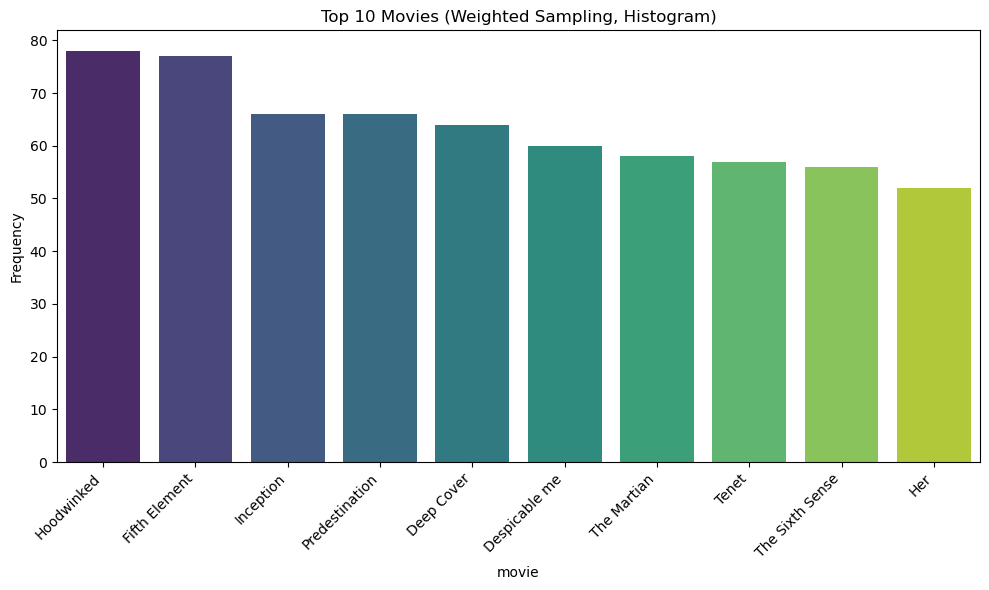

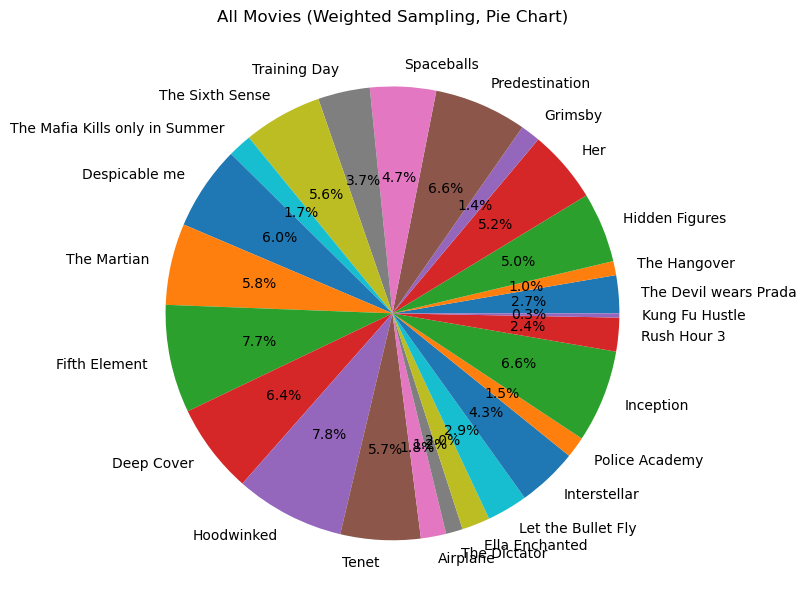

Selected movie: Hoodwinked
Frequency: 78


In [5]:
import random
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\samta\Desktop\List.txt"

# Read movie list
with open(file_path, "r", encoding="utf-8") as f:
    movies = [line.strip() for line in f if line.strip()]

# ----- Define weights (probabilities) for each movie -----
# Example: increasing weights (later movies more likely).
# Adjust these as you like; length must equal len(movies).
weights = [i + 1 for i in range(len(movies))]

# Random weighted sampling with replacement
selections = random.choices(movies, weights=weights, k=1000)

# Count frequencies
counts = Counter(selections)

# Put into a DataFrame for seaborn
df = pd.DataFrame({
    "movie": list(counts.keys()),
    "count": list(counts.values())
})

# ----- Histogram (bar plot) for top 10 using seaborn -----
top10_df = df.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_df,
    x="movie",
    y="count",
    hue="movie",     # needed so palette is not deprecated
    palette="viridis",
    legend=False     # hide redundant legend
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title("Top 10 Movies (Weighted Sampling, Histogram)")
plt.tight_layout()
plt.show()

# ----- Pie chart for ALL movies -----
plt.figure(figsize=(8, 8))
plt.pie(df["count"], labels=df["movie"], autopct="%1.1f%%")
plt.title("All Movies (Weighted Sampling, Pie Chart)")
plt.tight_layout()
plt.show()

# Winner (most frequent)
winner_row = df.sort_values("count", ascending=False).iloc[0]
print("Selected movie:", winner_row["movie"])
print("Frequency:", winner_row["count"])
